In [1]:
import pandas as pd  
import numpy as np  
  
 
wine = pd.read_csv('wine_data_project.csv')  
  

In [2]:
wine.head()

,Name,abv,year,PriceRetail,Appellation_Region_Name,Varietal_Name,Varietal_WineType_Name,Winemakers_Notes
0,Milbrandt Traditions Merlot 2007,14.2,2007.0,14.99,Washington,Merlot,Red Wines,Our 2007 Traditions Merlot features grapes fro...
1,MacLaren Drouthy Neebors Syrah 2009,14.0,2009.0,35.00,California,Syrah/Shiraz,Red Wines,Deep Purple color. Layered aromatics: Black Ra...
2,Cliff Lede Poetry Stags Leap District Cabernet...,14.5,2001.0,125.00,California,Cabernet Sauvignon,Red Wines,Beautiful bottle-aged aromas are revealing the...
3,Tenuta di Biserno Campo di Sasso Insoglio del ...,14.5,2007.0,34.00,Italy,Other Red Blends,Red Wines,Insoglio del Cinghiale is the foundation wine ...
4,Gordon Brothers Cabernet Sauvignon 2010,13.8,2010.0,26.99,Washington,Cabernet Sauvignon,Red Wines,"Black cherry and cranberry, vanilla roasting o..."


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
Name                       2000 non-null object
abv                        2000 non-null float64
year                       1994 non-null float64
PriceRetail                2000 non-null float64
Appellation_Region_Name    1999 non-null object
Varietal_Name              2000 non-null object
Varietal_WineType_Name     2000 non-null object
Winemakers_Notes           2000 non-null object
dtypes: float64(3), object(5)
memory usage: 125.1+ KB


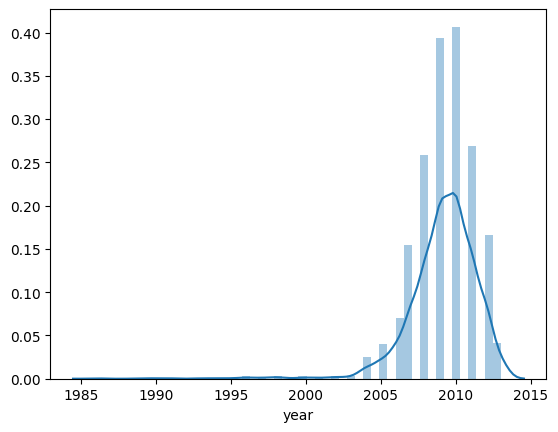

In [5]:
import seaborn as sns  
sns.distplot(wine.year[wine.year.notnull()])

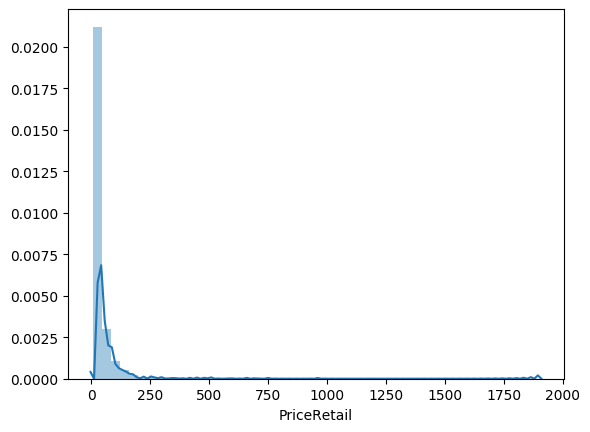

In [6]:
sns.distplot(wine.PriceRetail)  

[Text(0.5, 0, 'Log (PriceRetail)')]

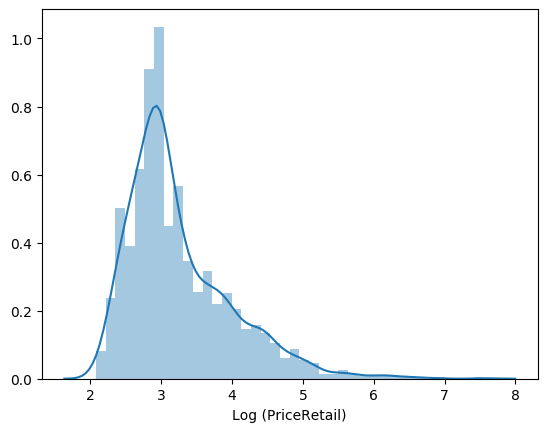

In [7]:
log_price_retail = sns.distplot(np.log(wine.PriceRetail))  
log_price_retail.set(xlabel='Log (PriceRetail)')  

[Text(0, 0.5, 'Appellation Region Name')]

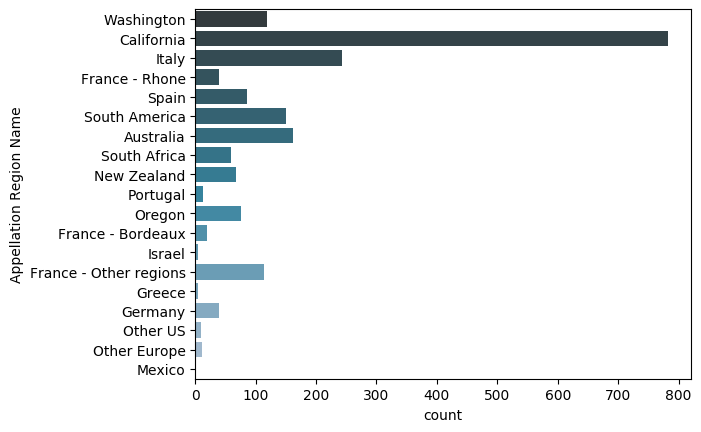

In [8]:
Appellation_Reg = sns.countplot(y="Appellation_Region_Name",  
data=wine, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='Appellation Region Name')  

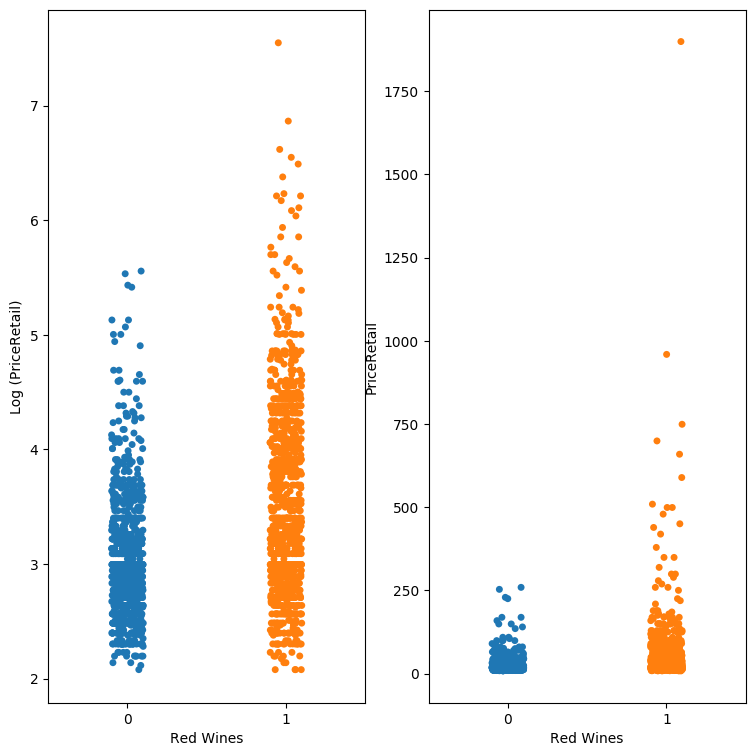

In [9]:
import matplotlib.pyplot as plt  
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(9, 9), sharex=True)  
ax = sns.stripplot(x=pd.get_dummies(wine.Varietal_WineType_Name)['Red Wines'],   
y=np.log(wine.PriceRetail), ax=axes[0], jitter = True)  
ax.set(ylabel='Log (PriceRetail)')  
sns.stripplot(x=pd.get_dummies(wine.Varietal_WineType_Name)['Red Wines'],   
y=wine.PriceRetail, ax=axes[1], jitter = True)  

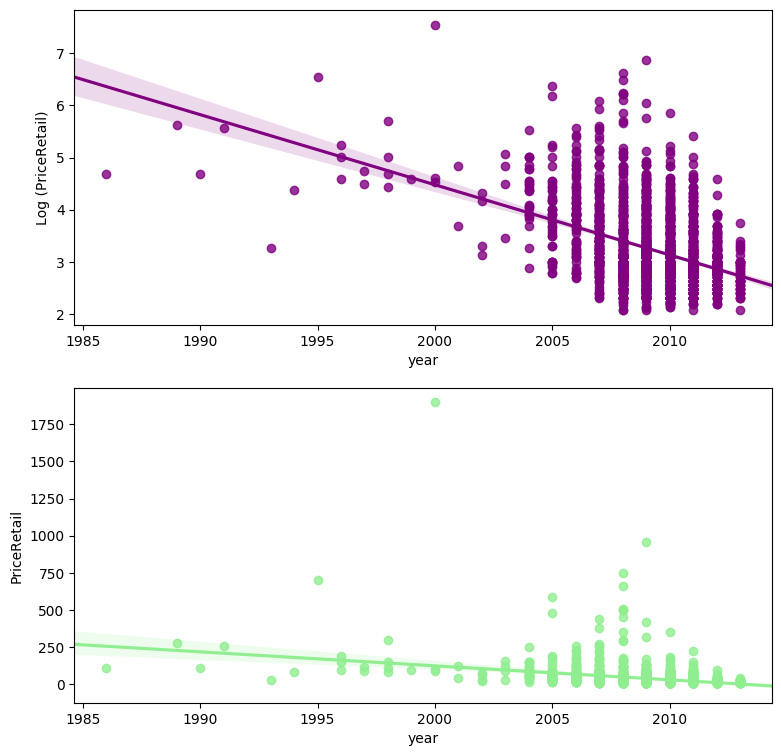

In [10]:
figure, axes = plt.subplots(nrows=2, ncols=1,figsize=(9, 9))  
ax = sns.regplot(wine.year,np.log(wine.PriceRetail), ax=axes[0],   
color = 'purple')  
ax.set(ylabel='Log (PriceRetail)')  
sns.regplot(wine.year,wine.PriceRetail, ax=axes[1],   
color = 'lightgreen')  

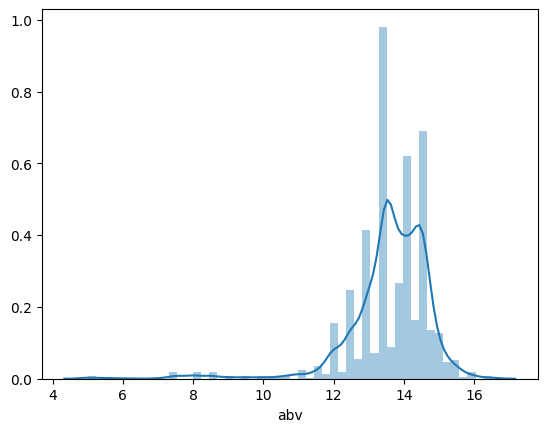

In [11]:
sns.distplot(wine.abv)  


In [12]:
predictors = pd.concat([wine.year,   
pd.get_dummies(wine.Varietal_WineType_Name).ix[:,0],  
pd.get_dummies(wine.Appellation_Region_Name)] , axis = 1)  

/Users/kyawsanhtay/opt/anaconda3/envs/DataScience_37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [13]:
predictors.isnull().sum()  

year                      6
Red Wines                 0
Australia                 0
California                0
France - Bordeaux         0
France - Other regions    0
France - Rhone            0
Germany                   0
Greece                    0
Israel                    0
Italy                     0
Mexico                    0
New Zealand               0
Oregon                    0
Other Europe              0
Other US                  0
Portugal                  0
South Africa              0
South America             0
Spain                     0
Washington                0
dtype: int64

In [14]:
from sklearn.preprocessing import Imputer  
imp = Imputer(missing_values='NaN', strategy='median', axis=0)  
predictors_imputed = imp.fit_transform(predictors) 

/Users/kyawsanhtay/opt/anaconda3/envs/DataScience_37/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/Users/kyawsanhtay/opt/anaconda3/envs/DataScience_37/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/Users/kyawsanhtay/opt/anaconda3/envs/DataScience_37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(predictors_imputed,   
np.log(wine["PriceRetail"]),   
test_size=0.30, random_state=42)   

In [26]:
from sklearn.linear_model import LassoCV  
model_lasso_cv = LassoCV(cv=10, precompute = False, normalize=True,   
n_jobs = -1).fit(X_train, y_train)  

[Text(0.5, 0, 'Penalized Regression Coefficients')]

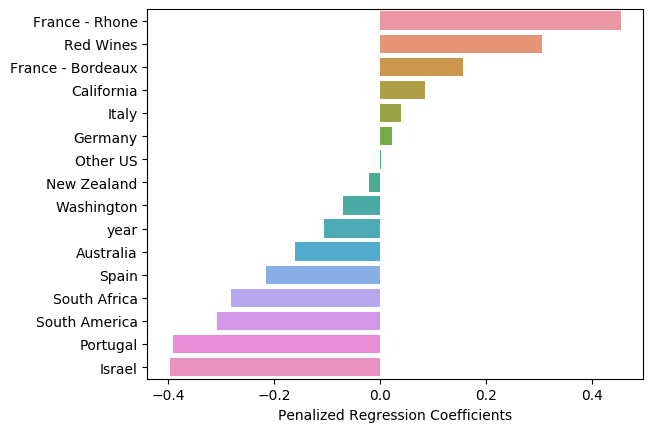

In [30]:
lasso_coef = pd.DataFrame(np.round_(model_lasso_cv.coef_, decimals=3),   
predictors.columns, columns = ["penalized_regression_coefficients"])  
# remove the non-zero coefficients  
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]  
# sort the values from high to low  
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients',   
ascending = False)  
# plot the sorted dataframe  
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index ,   
data=lasso_coef)  
ax.set(xlabel='Penalized Regression Coefficients')

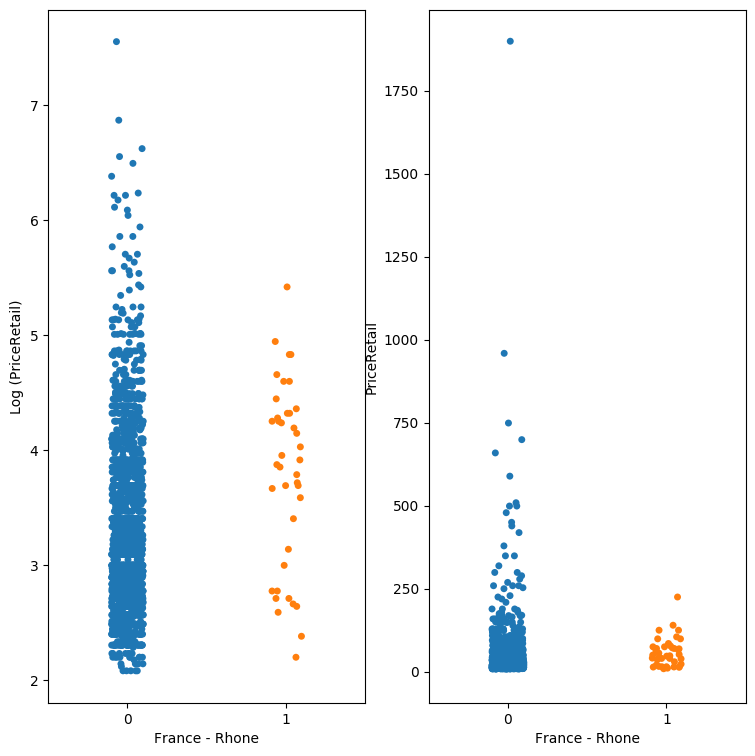

In [34]:
import matplotlib.pyplot as plt  
# set up the canvas- 1 row with 2 columns for the plots  
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(9, 9), sharex=True)  
# set up the plot for the log-transformed price variable  
ax = sns.stripplot(x=pd.get_dummies(wine.Appellation_Region_Name)['France - Rhone'],   
	y=np.log(wine.PriceRetail), ax=axes[0], jitter = True)  
ax.set(ylabel='Log (PriceRetail)')  
# set up the plot for the original scale price variable  
sns.stripplot(x=pd.get_dummies(wine.Appellation_Region_Name)['France - Rhone'],   
	y=wine.PriceRetail, ax=axes[1], jitter = True)

In [35]:
from sklearn.metrics import mean_squared_error  
train_RMSE = np.sqrt(mean_squared_error(y_train, model_lasso_cv.predict(X_train)))  
test_RMSE = np.sqrt(mean_squared_error(y_test, model_lasso_cv.predict(X_test)))  
print('training data RMSE')  
print(train_RMSE)  
print('test data RMSE')  
print(test_RMSE)  

training data RMSE
0.6244441944478555
test data RMSE
0.633345534042644


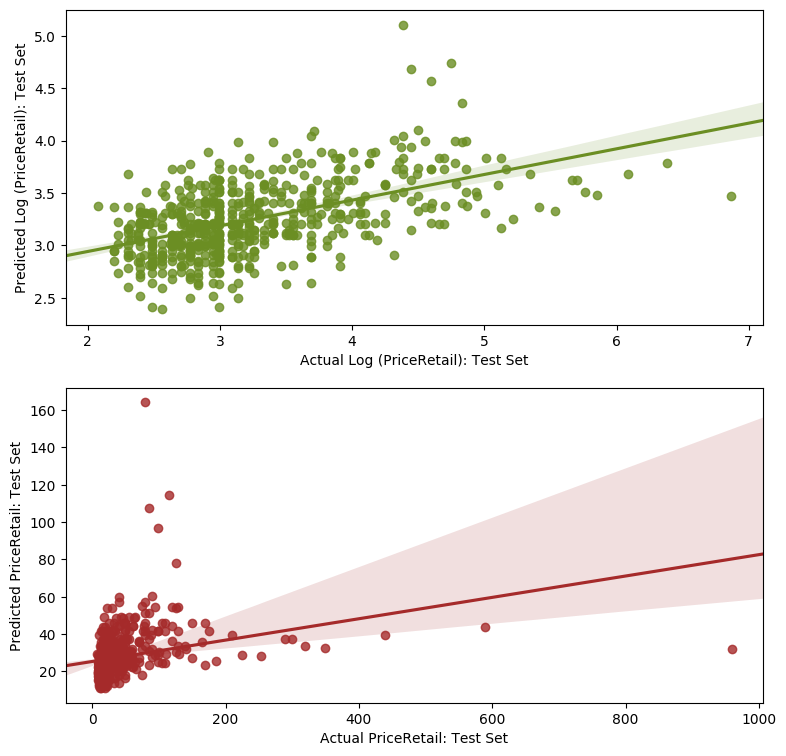

In [36]:
figure, axes = plt.subplots(nrows=2, ncols=1,figsize=(9, 9))  
# both test data and predictions on log scale  
ax = sns.regplot(x = y_test, y = model_lasso_cv.predict(X_test), ax=axes[0],   
color = 'olivedrab')  
ax.set(xlabel='Actual Log (PriceRetail): Test Set',   
ylabel = 'Predicted Log (PriceRetail): Test Set')  
# both test data and predictions on actual (anti-logged) scale  
ax = sns.regplot(x = np.exp(y_test), y = np.exp(model_lasso_cv.predict(X_test)), ax=axes[1],   
color = 'brown')  
ax = ax.set(xlabel='Actual PriceRetail: Test Set',   
ylabel = 'Predicted PriceRetail: Test Set')  

In [40]:
predictors = pd.concat([wine.abv, wine.year,   
	wine.PriceRetail,   
	pd.get_dummies(wine.Appellation_Region_Name)],   
	axis = 1)  
   
# impute the missing values in the predictor matrix  
from sklearn.preprocessing import Imputer  
imp = Imputer(missing_values='NaN', strategy='median', axis=0)  
predictors_imputed = imp.fit_transform(predictors)  
  
# train-test split  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(predictors_imputed,   
	wine["Varietal_WineType_Name"],   
	test_size=0.30, random_state=42)  

/Users/kyawsanhtay/opt/anaconda3/envs/DataScience_37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
from sklearn.ensemble import RandomForestClassifier  
# Create the random forest object  
rforest = RandomForestClassifier(n_estimators = 500, n_jobs=-1)  
# Fit the training data   
rforest_model = rforest.fit(X_train,y_train)  
### Do prediction (class) on test data  
preds_class_rf = rforest_model.predict(X_test)  
# confusion matrix: how well do our predictions match the actual data?  
pd.crosstab(pd.get_dummies(y_test)['Red Wines'],preds_class_rf)  

col_0,Red Wines,White Wines
Red Wines,,
0,63,235
1,222,80


In [53]:
from sklearn.ensemble import RandomForestClassifier  
# Create the random forest object  
rforest = RandomForestClassifier(n_estimators = 500, n_jobs=-1)  
# Fit the training data   
rforest_model = rforest.fit(X_train,y_train)  
### Do prediction (class) on test data  
preds_class_rf = rforest_model.predict(X_test)  
# confusion matrix: how well do our predictions match the actual data?  
pd.crosstab(pd.get_dummies(y_test)['Red Wines'],preds_class_rf)  

col_0,Red Wines,White Wines
Red Wines,,
0,64,234
1,220,82


[Text(0.5, 0, 'Wine Type')]

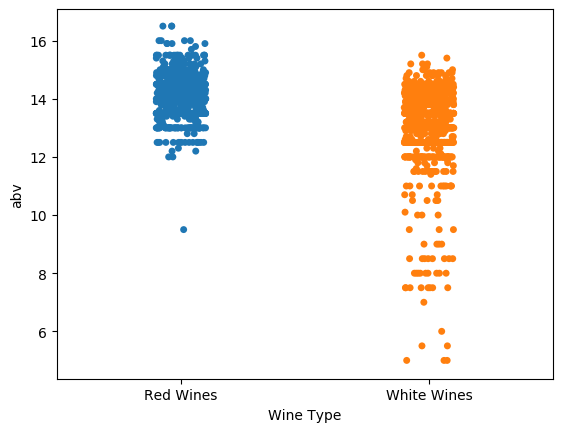

In [60]:
abv_winetype = sns.stripplot(x="Varietal_WineType_Name", y="abv",   
	data=wine, jitter = True)  
abv_winetype.set(xlabel='Wine Type')  

In [61]:
import pandas as pd  
from nltk.corpus import stopwords  
import numpy as np  
import seaborn as sns  
from nltk.stem.porter import *  
stemmer = PorterStemmer()  


In [62]:
def text_to_words(raw_text):  
	# 1. Remove non-letters   
	letters_only = re.sub("[^a-zA-Z]", " ", raw_text)   
	# 2. Convert to lower case, split into individual words  
	words = letters_only.lower().split()  
	# 3. Remove Stopwords. In Python, searching a set is much faster than   
	# searching a list, so convert the stop words to a set  
	stops = set(stopwords.words("english"))   
	# 4. Remove stop words  
	meaningful_words = [w for w in words if not w in stops]   
	# 5. Stem words. Need to define porter stemmer above  
	singles = [stemmer.stem(word) for word in meaningful_words]  
	# 6. Join the words back into one string separated by space,   
	# and return the result.  
	return( " ".join( singles ))   

In [67]:
from sklearn.ensemble import RandomForestClassifier  
# Create the random forest object  
rforest = RandomForestClassifier(n_estimators = 500, n_jobs=-1)  
# Fit the training data   
rforest_model = rforest.fit(X_train,y_train)  
### Do prediction (class) on test data  
preds_class_rf = rforest_model.predict(X_test)  
# confusion matrix: how well do our predictions match the actual data?  
pd.crosstab(pd.get_dummies(y_test)['Red Wines'],preds_class_rf)   

col_0,Red Wines,White Wines
Red Wines,,
0,64,234
1,221,81


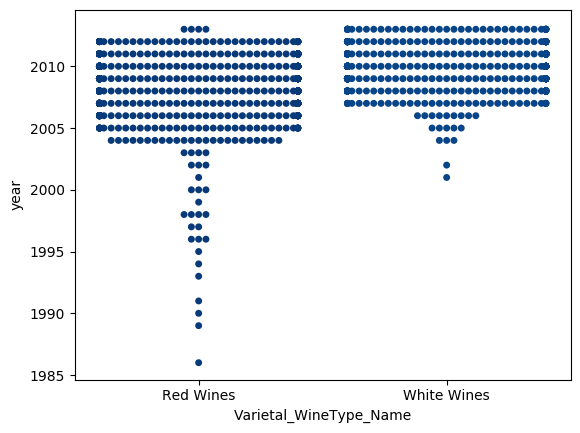

In [72]:
sns.swarmplot(x="Varietal_WineType_Name",y="year",data=wine);

[Text(0, 0.5, 'Varietal_Name')]

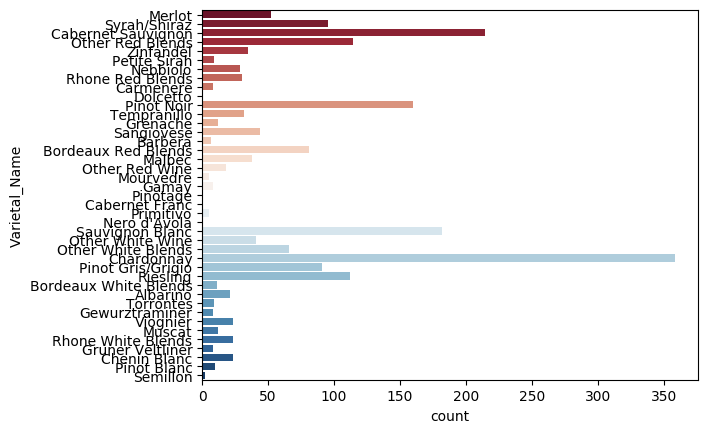

In [79]:
Appellation_Reg = sns.countplot(y="Varietal_Name",  
data=wine, palette="RdBu");  
Appellation_Reg.set(ylabel='Varietal_Name')   